In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Q1

We need to evaluate $$f(x) = \sin(x)$$ at $x = 2\pi/5$
using 
1. Forward Diff 
2. Central Diff
3. Backward Diff
4. Five point

In [2]:
def f(x):
    return np.sin(x)

In [3]:
def fd(x,h,f=f):
    y = (f(x+h) - f(x))/h
    return y
def bd(x,h,f=f):
    y = (f(x) - f(x-h))/h
    return y
def cd(x,h,f=f):
    y = (f(x +h) - f(x-h))/(2*h)
    return y

def fivept(x,h,f=f):
    y = - f(x + 2*h) + 8*f(x+h) -8*f(x-h) + f(x-2*h)
    y = y/(12 *h)
    return y

In [4]:
X = 2*np.pi/5
hs = np.array([0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001])

In [5]:
FD = fd(X, hs)
BD = bd(X, hs)
CD = cd(X, hs)
VPT = fivept(X,hs)

In [6]:
s = f"h "+" "*8+"FD"+" "*8+"CD"+" "*8+"BD"+" "*8+"5PT \n"
for i in range(0, len(hs)):
    s = s + f"{hs[i]:.4f}{FD[i]:10.4f}{BD[i]:10.4f}{CD[i]:10.4f}{VPT[i]:10.4f}\n"
    
    
        
print(s)
    

h         FD        CD        BD        5PT 
0.5000    0.0634    0.5292    0.2963    0.3084
0.2000    0.2122    0.4018    0.3070    0.3090
0.1000    0.2610    0.3560    0.3085    0.3090
0.0500    0.2851    0.3327    0.3089    0.3090
0.0200    0.2995    0.3185    0.3090    0.3090
0.0100    0.3043    0.3138    0.3090    0.3090
0.0050    0.3066    0.3114    0.3090    0.3090
0.0020    0.3081    0.3100    0.3090    0.3090
0.0010    0.3085    0.3095    0.3090    0.3090
0.0005    0.3088    0.3093    0.3090    0.3090
0.0002    0.3089    0.3091    0.3090    0.3090
0.0001    0.3090    0.3091    0.3090    0.3090



In [7]:
ALPHA = np.cos(2*np.pi/5)


In [8]:
ERRFD = abs(FD- ALPHA)
ERRBD = abs(BD- ALPHA)
ERRCD = abs(CD- ALPHA)
ERRVPT = abs(VPT- ALPHA)

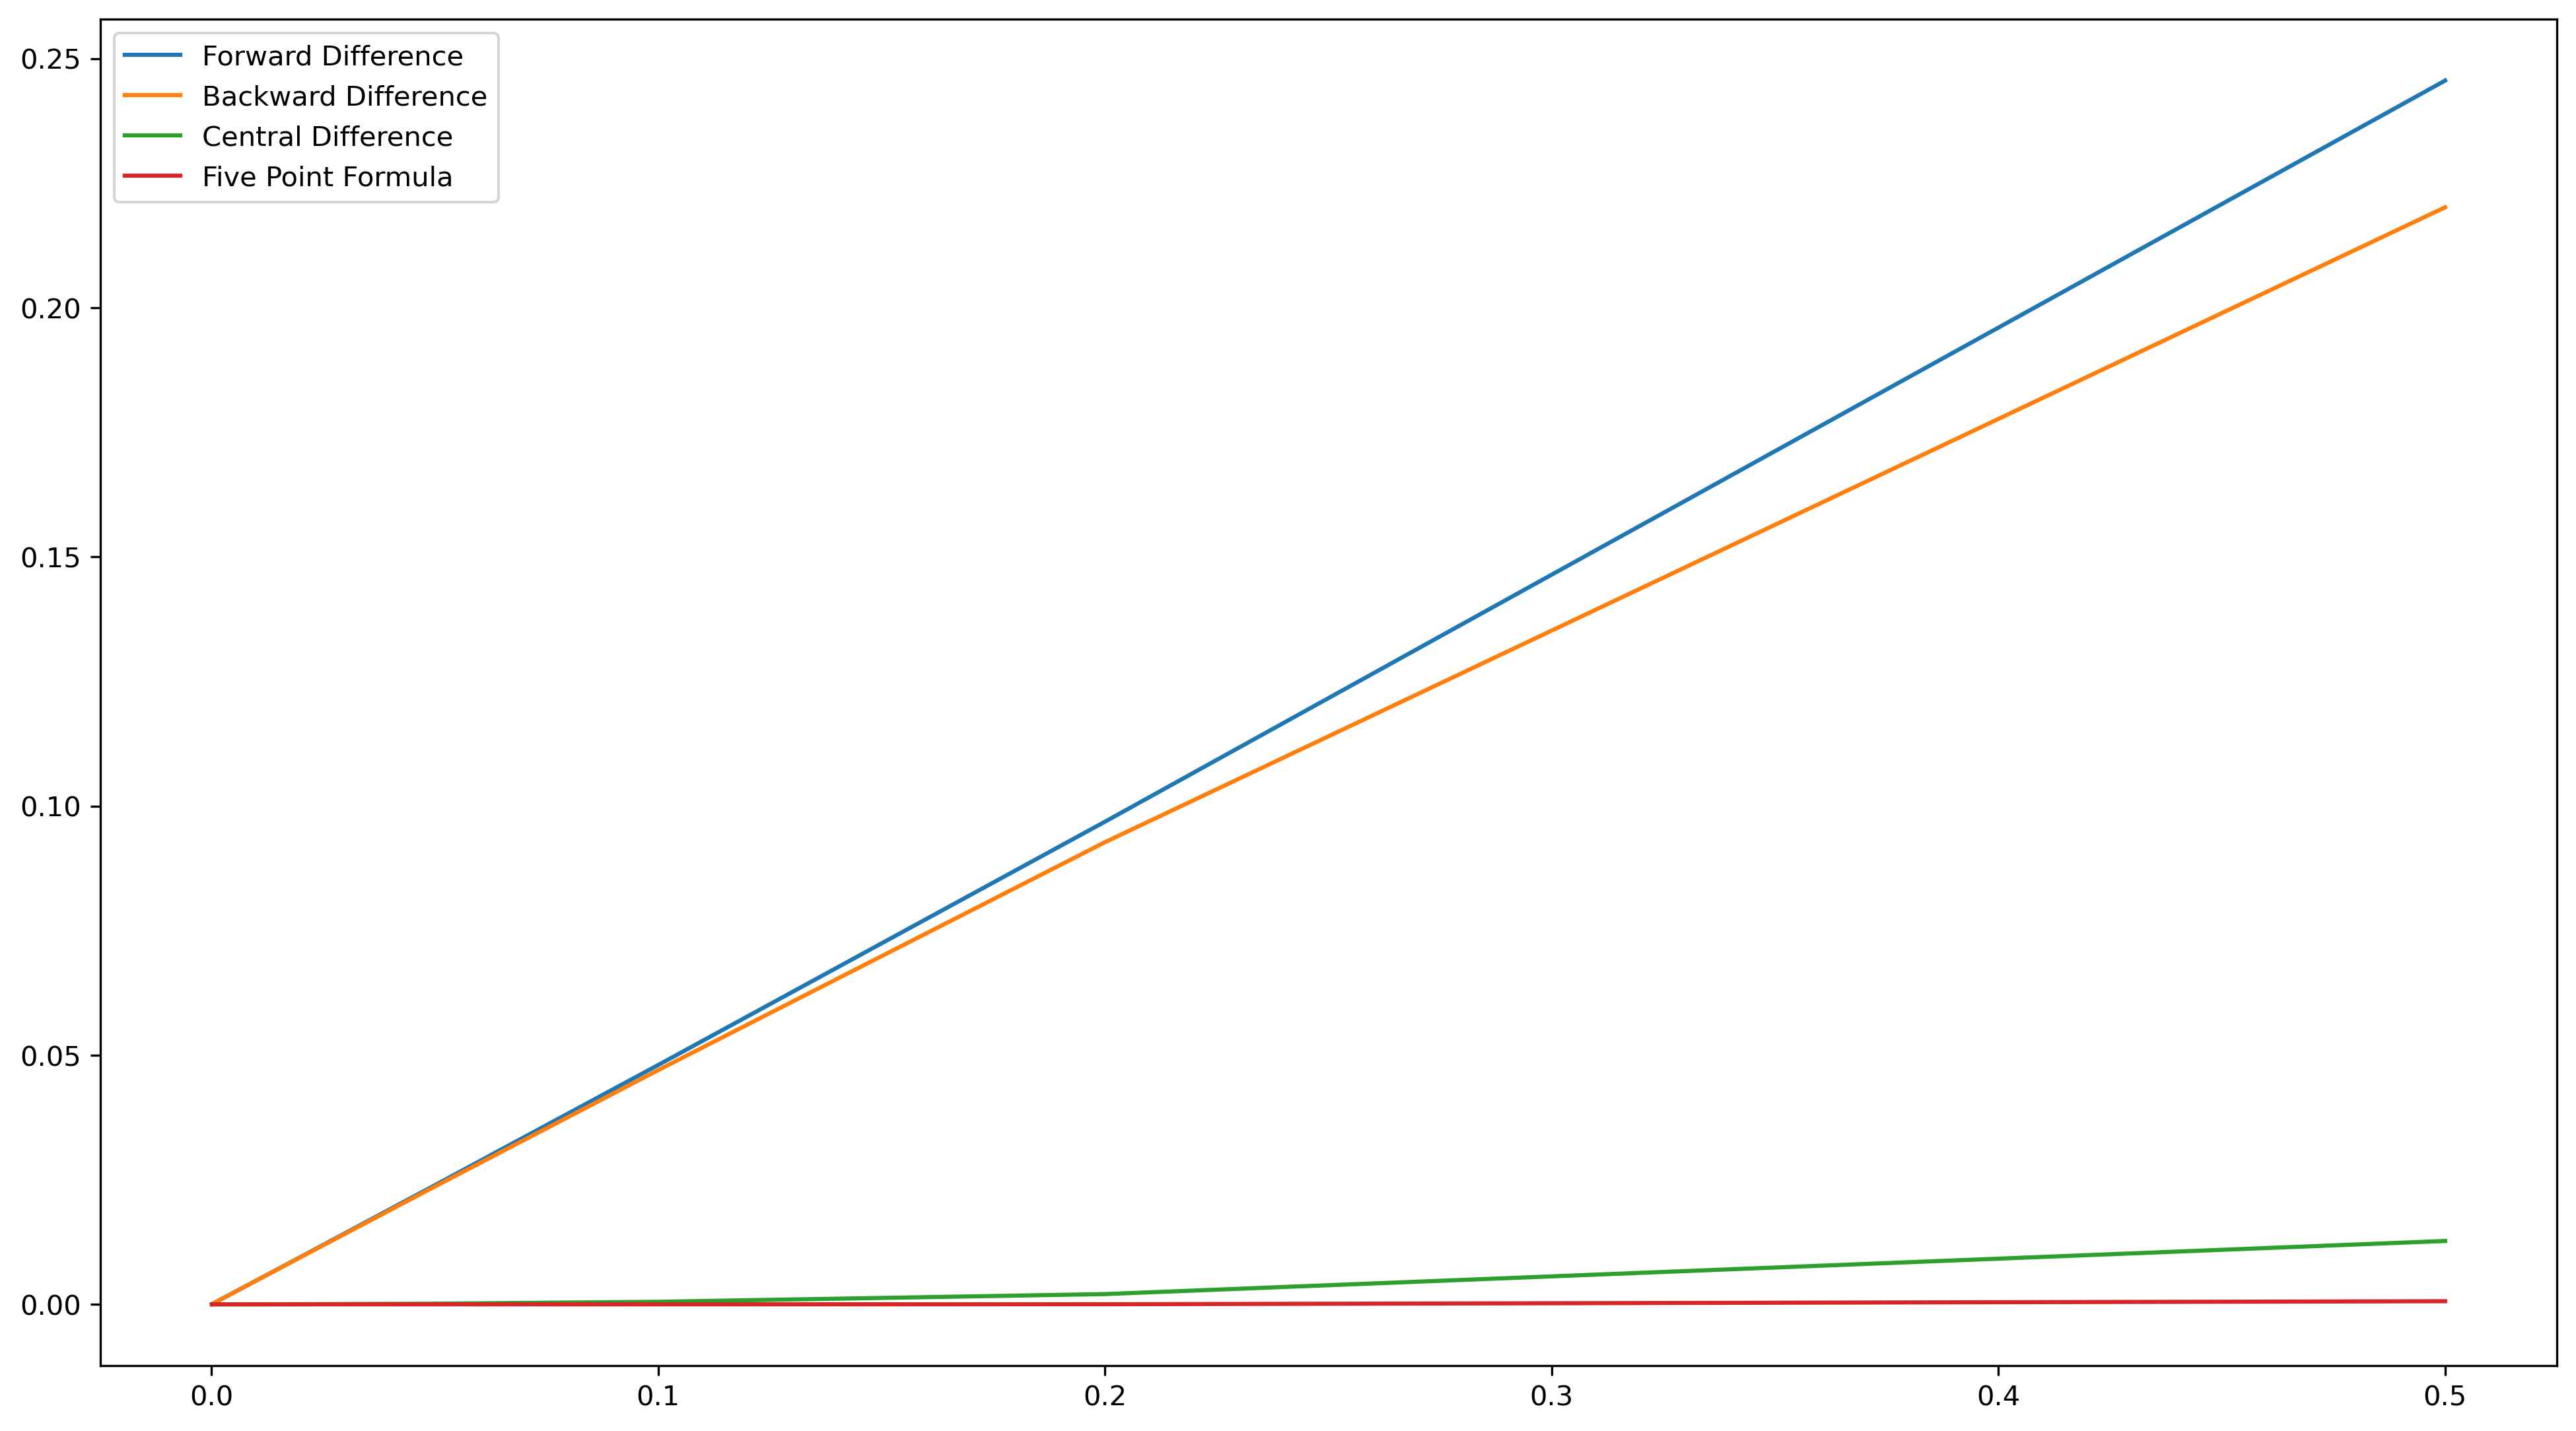

In [9]:
fig, axes =plt.subplots(1,1,figsize=(16,9), dpi=300)
# axes.set_xscale('log')
# axes.set_yscale('log')
axes.plot(hs, ERRFD, label = "Forward Difference")
axes.plot(hs, ERRBD, label = "Backward Difference")
axes.plot(hs, ERRCD, label = "Central Difference")
axes.plot(hs, ERRVPT, label = "Five Point Formula")
axes.legend()

In [10]:
# FIT
def linfit(x,a,b):
    return a*x+b

In [11]:
FDp, FDcov = curve_fit(linfit, np.log(hs), np.log(ERRFD))
BDp, BDcov = curve_fit(linfit, np.log(hs), np.log(ERRBD))
CDp, CDcov = curve_fit(linfit, np.log(hs), np.log(ERRCD))
VPTp, VPTcov = curve_fit(linfit, np.log(hs[:9]), np.log(ERRVPT[:9]))

In [408]:
# Comparison
FDp,CDp,BDp, VPTp

(array([ 1.00281838, -0.72345933]),
 array([ 1.9992408 , -2.97112419]),
 array([ 0.9945609 , -0.78079027]),
 array([ 4.00840755, -4.56468771]))

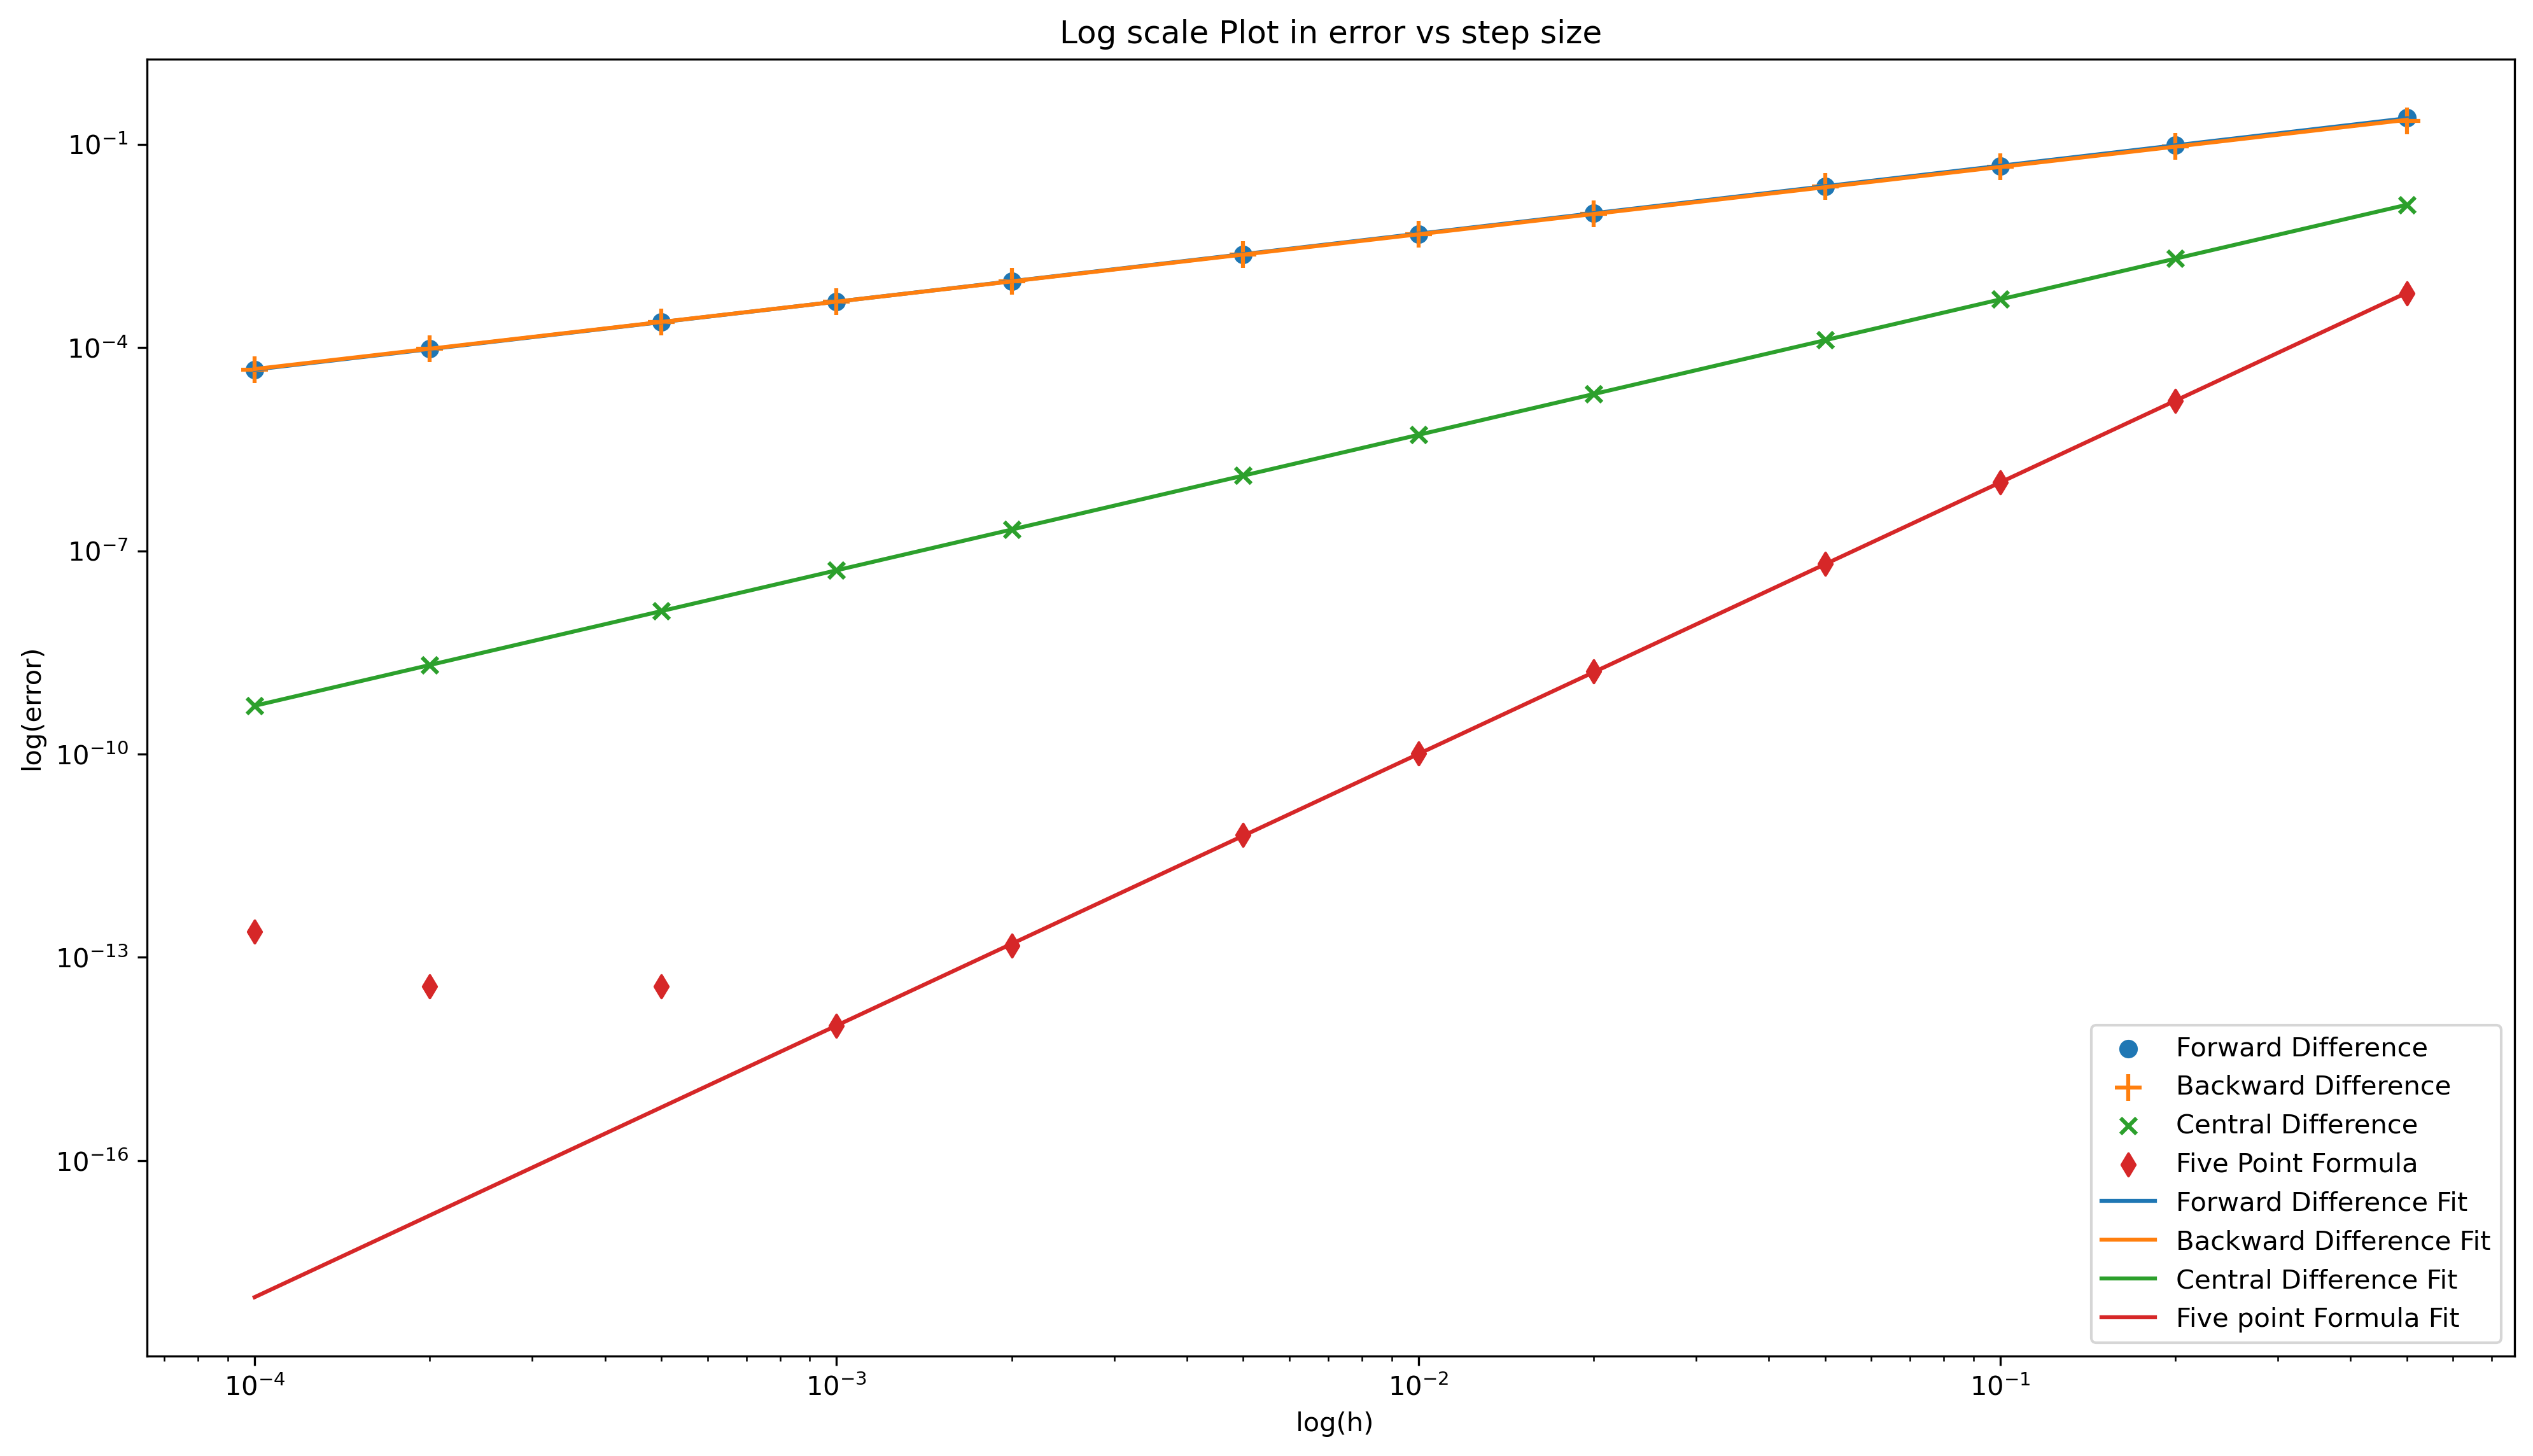

In [18]:
fig, axes =plt.subplots(1,1,figsize=(16,9), dpi=300)
xval =np.linspace(np.log(hs[0]),np.log(hs[-1]),500)
FDfit = linfit(xval, *FDp)
BDfit = linfit(xval, *BDp)
CDfit = linfit(xval, *CDp)
VPTfit = linfit(xval, *VPTp)
axes.set_xscale('log')
axes.set_yscale('log')
axes.scatter(hs, ERRFD, label = "Forward Difference", marker="o")
axes.scatter(hs, ERRBD, label = "Backward Difference", marker ="+", s =100)
axes.scatter(hs, ERRCD, label = "Central Difference", marker ="x")
axes.scatter(hs, ERRVPT, label = "Five Point Formula", marker = "d")
axes.plot(np.exp(xval),np.exp(FDfit),label = "Forward Difference Fit")
axes.plot(np.exp(xval),np.exp(BDfit),label = "Backward Difference Fit")
axes.plot(np.exp(xval),np.exp(CDfit),label = "Central Difference Fit")
axes.plot(np.exp(xval),np.exp(VPTfit),label = "Five point Formula Fit")
axes.set_xlabel(" log(h)")
axes.set_ylabel("log(error)")
axes.set_title("Log scale Plot in error vs step size")
axes.legend()

# Q2

In [355]:
def F(x):
    return np.exp(x)
def trap(n,a,b,f=F):
    
    h = np.abs(b-a)/(n-1)
    x = np.arange(a,b+h/2,h)
    y = f(x)
    integral = 2*sum(y)-y[0]-y[-1]
    integral = integral*h/2
    return integral

def simpquad(n,a,b,f=F):
    if n%2 ==0:
        n = n-1
    h = np.abs(b-a)/(n-1)
    x = np.arange(a,b+h/2,h)
    y = f(x)
    integral = 2*sum(y[0::2])+4*sum(y[1::2])-y[0]-y[-1]
    integral = integral*h/3
    return integral

def simpcube(n,a,b,f=F):
    h = np.abs(b-a)/(n-1)
    x = np.arange(a,b+h/2,h)
    y = f(x)
    integral = y[0] + 3*sum(y[1:-2:3])+3*sum(y[2:-1:3])+2*sum(y[3:-3:3]) + y[-1]
    integral = integral*(3*h)/8
    return integral

def bode(n,a,b,f=F):
    h = np.abs(b-a)/(n-1)
    x = np.arange(a,b+h/2,h)
    y = f(x)
    integral = 7*y[0] + 7*y[-1] +32*sum(y[1:-1:2]) + 12*sum(y[2:-2:4]) + 14 *sum(y[4:-4:4])
    integral = integral*(2*h)/45

    return integral

Boole Error cannot be calculated since the error is too small for python to take a np.log value and takes random values after that 

In [356]:
A = 0
B = 1

# Adjusting Strip Size
H1 = np.array([20,200,2000,20000])
H2 = np.array([22,202,2002,20002])
H3 = np.array([21,201,2001,20001])
IT =  np.array([trap(i,A,B) for i in H1])
SQT = np.array([simpquad(i,A,B) for i in H2])
SCT = np.array([simpcube(i,A,B) for i in H2])
BT =  np.array([bode(i,A,B) for i in H3])

In [357]:
ACTINT = np.e -1

ERRIT = abs(IT - ACTINT)
ERRSQT = abs(SQT - ACTINT)
ERRSCT = abs(SCT - ACTINT)
ERRBT = abs(BT - ACTINT)
h1 = 1/(H1 -1)
h2 = 1/(H2 -1)
h3 = 1/(H3 -1)

In [409]:
# Comparison
TRp, TRcov = curve_fit(linfit, np.log(h1), np.log(ERRIT))
SQp, SQcov = curve_fit(linfit, np.log(h2[0:2]), np.log(ERRSQT[0:2]))
SCp, SCcov = curve_fit(linfit, np.log(h2[0:2]), np.log(ERRSCT[0:2]))
# BTp, BTcov = curve_fit(linfit, np.log(h3), np.log(ERRBT))
TRp, SQp, SCp

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(array([ 1.99998975, -1.94365122]),
 array([ 4.07744719, -4.22097921]),
 array([ 3.99977223, -3.841935  ]))

In [391]:
# s = f"{0.5:4.4f}, {0.2:4.4f}, {0.1:4.4f}, {0.05:4.4f}, {0.02:4.4f}, {0.01:4.4f}, {0.005:4.4f}, {0.002:4.4f}, {0.001:4.4f}, {0.0005:4.4f}, {0.0002:4.4f}, {0.0001:4.4f} \n"
s = f"N "+" "*8+"Trap"+" "*9+"Simp1/3"+" "*4+"Simp3/8"+" "*8+"Bode \n"
for i in range(0, len(H1)):
    s = s + f"{H1[i]:8.0f}{IT[i]:12.8f}{SQT[i]:12.8f}{SCT[i]:12.8f}{BT[i]:12.8f}\n"
    
    
        
print(s)

N         Trap         Simp1/3    Simp3/8        Bode 
      20  1.71867846  1.71828189  1.71828194  1.71828183
     200  1.71828544  1.71828183  1.71828183  1.71828183
    2000  1.71828186  1.71828183  1.71828183  1.71828183
   20000  1.71828183  1.71828183  1.71828183  1.71828183



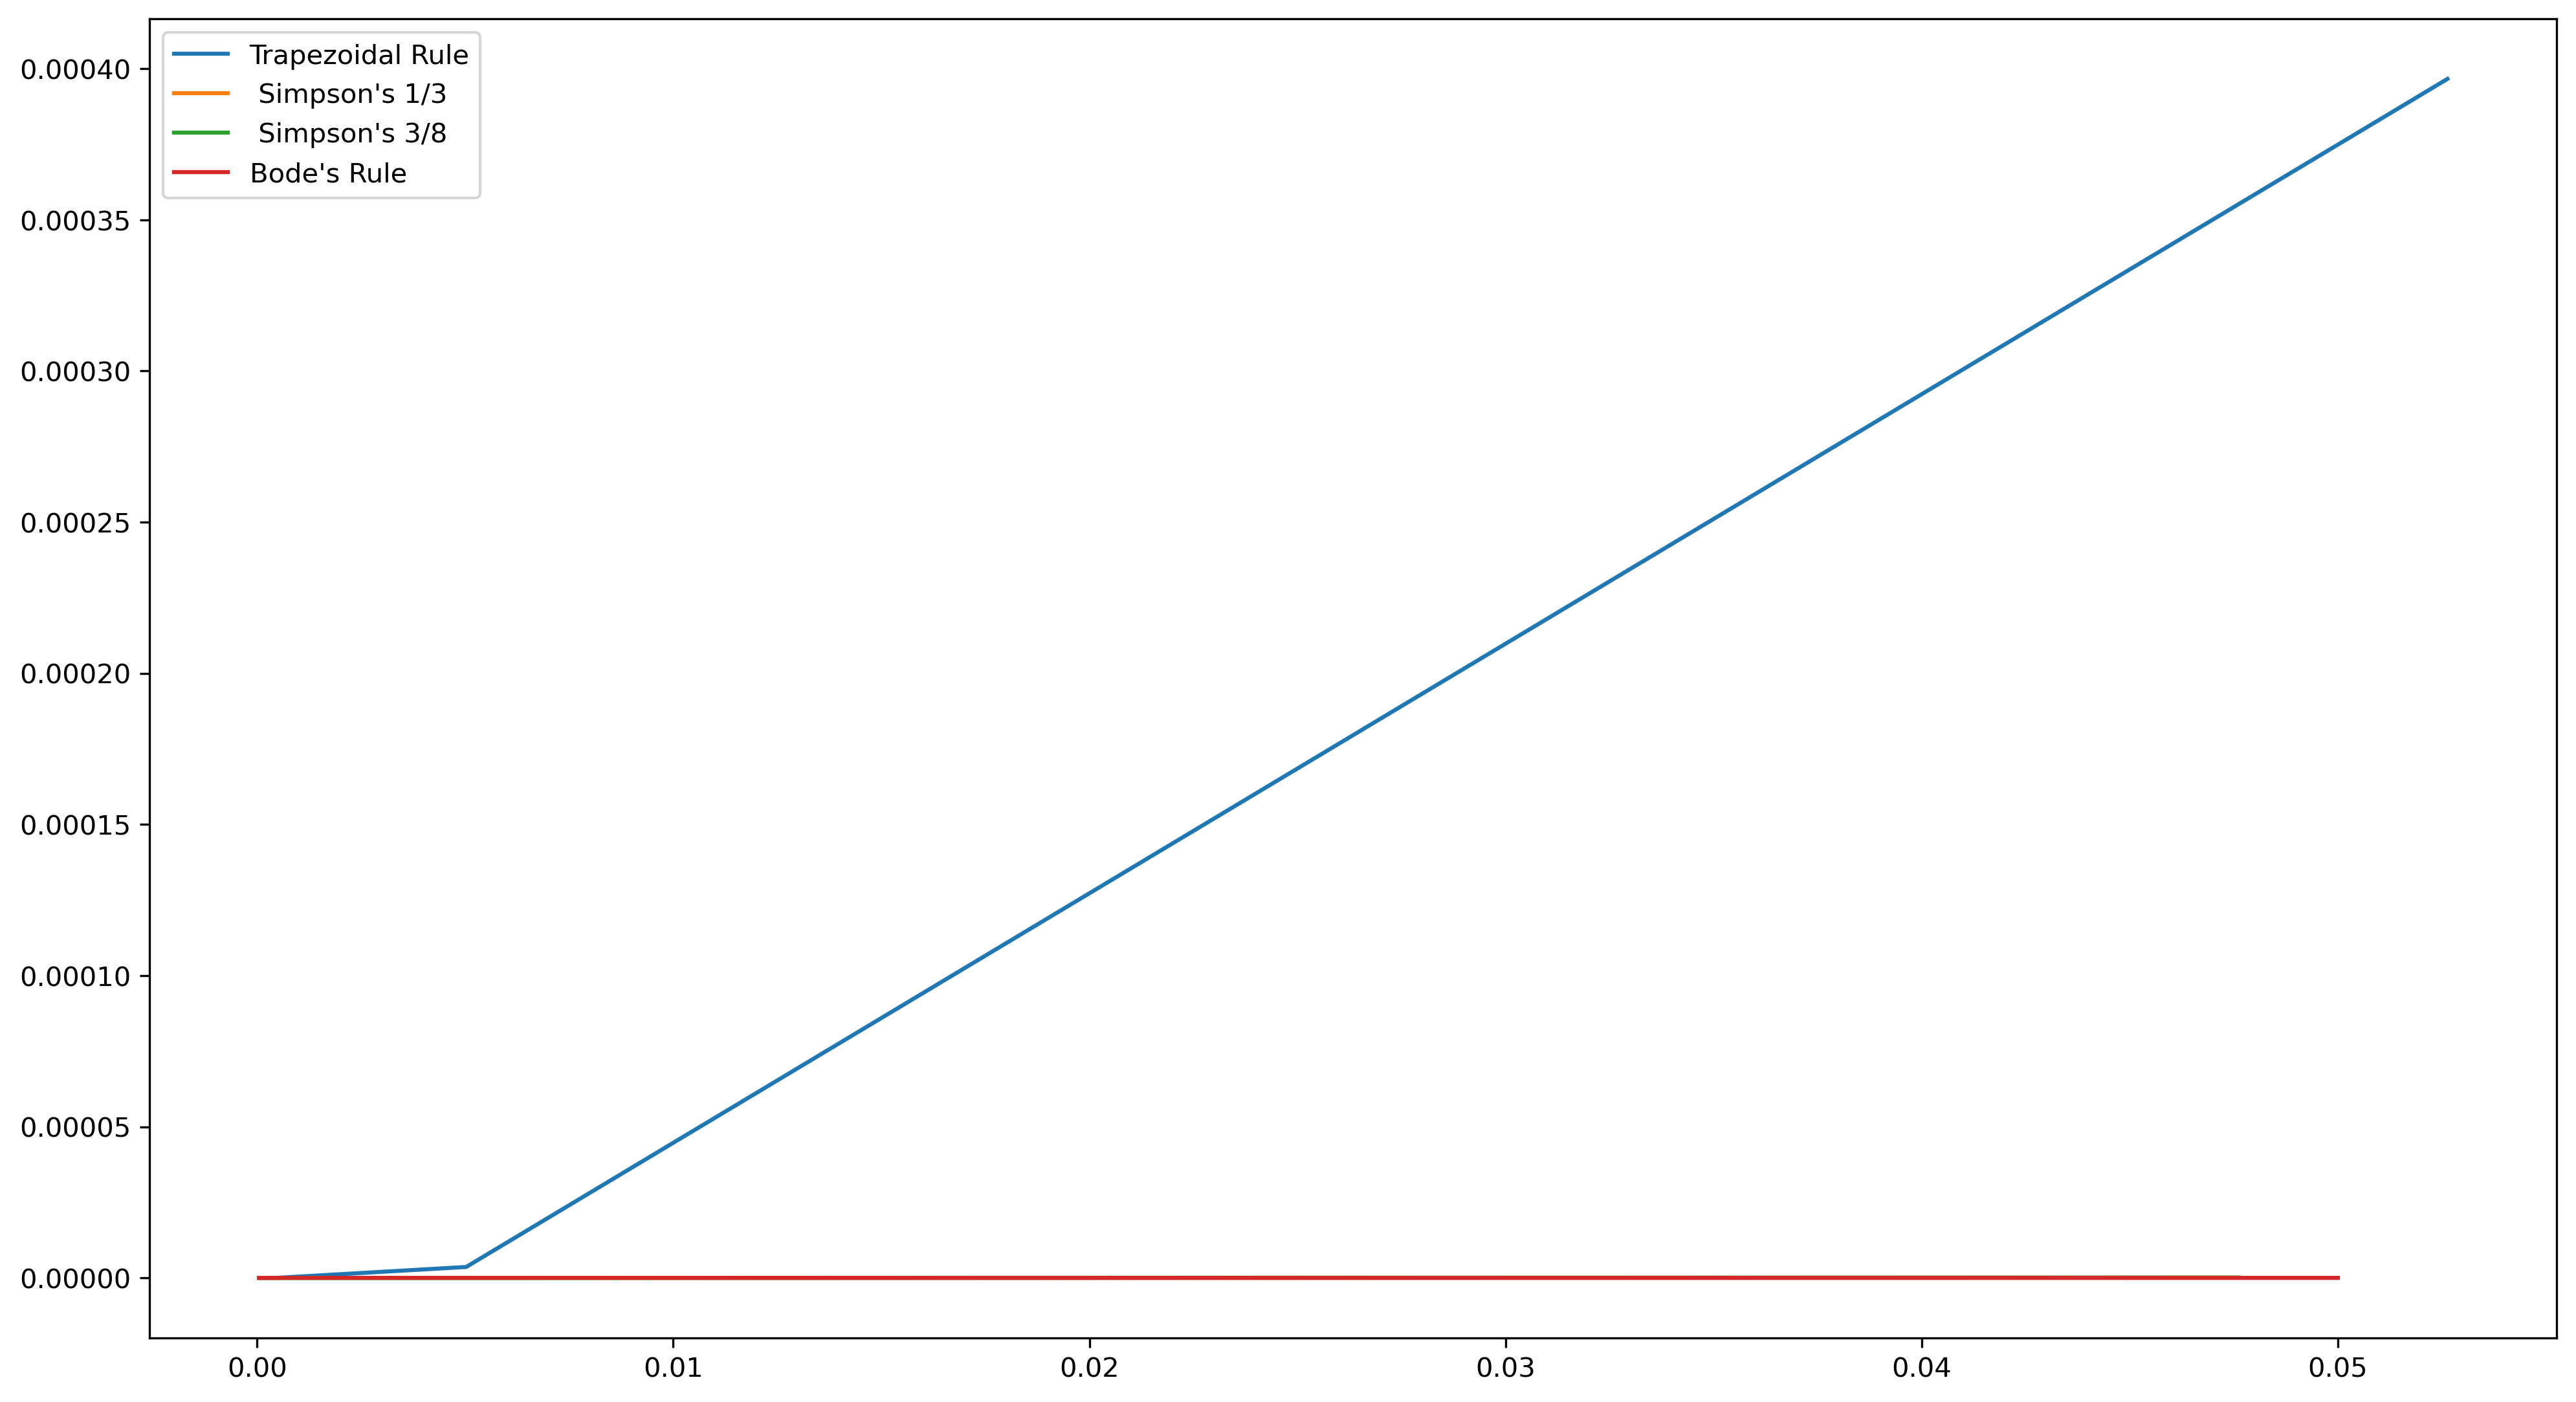

In [363]:
fig, axes = plt.subplots(1,1, figsize=(16,9), dpi = 300)
axes.plot(h1, ERRIT, label = "Trapezoidal Rule")
axes.plot(h2, ERRSQT, label =" Simpson's 1/3")
axes.plot(h2, ERRSCT, label =" Simpson's 3/8")
axes.plot(h3, ERRBT, label="Bode's Rule")
axes.legend()

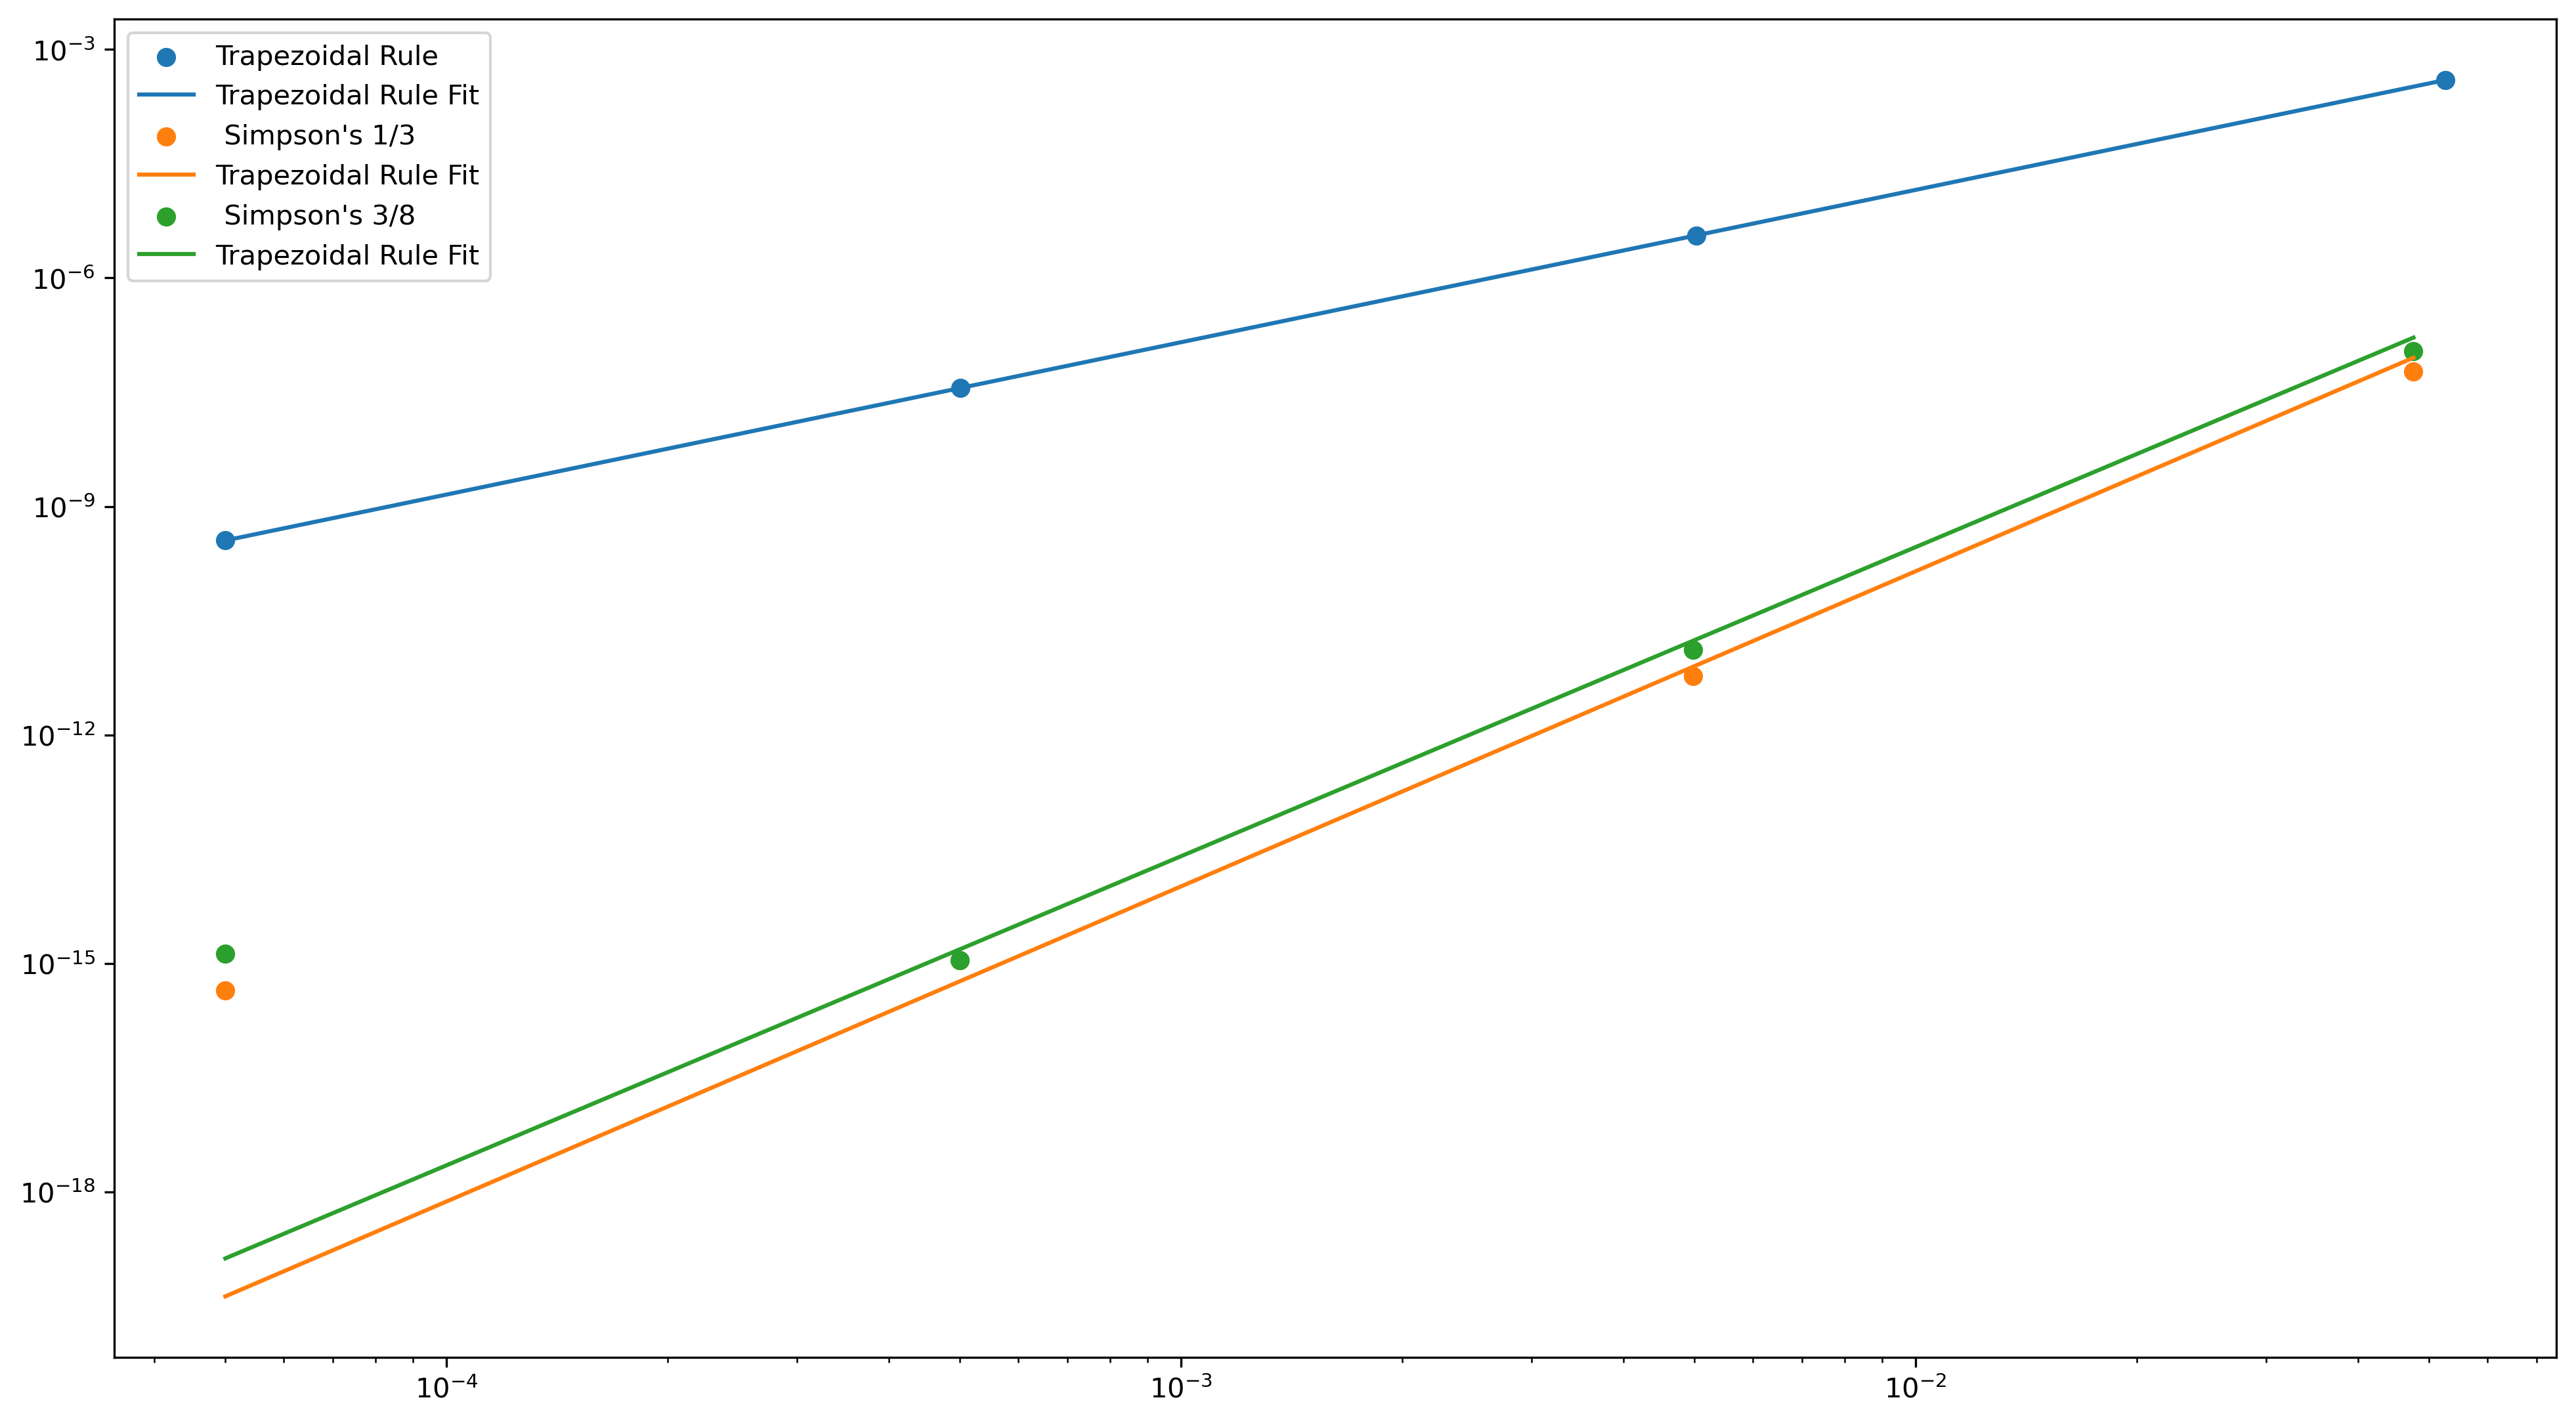

In [372]:
fig, axes = plt.subplots(1,1, figsize=(16,9), dpi = 300)
axes.set_xscale('log')
axes.set_yscale('log')
xdat1 = np.linspace(np.log(h1[0]), np.log(h1[-1]),500)
xdat2 = np.linspace(np.log(h2[0]), np.log(h2[-1]),500)

fitIT = linfit(xdat1,*TRp)
fitSCT = linfit(xdat1,*SQp)
fitSQT = linfit(xdat1,*SCp)

axes.scatter(h1, ERRIT, label = "Trapezoidal Rule")
axes.plot(np.exp(xdat1), np.exp(fitIT), label = "Trapezoidal Rule Fit")
axes.scatter(h2, ERRSQT, label =" Simpson's 1/3")
axes.plot(np.exp(xdat2), np.exp(fitSCT), label = "Trapezoidal Rule Fit")
axes.scatter(h2, ERRSCT, label =" Simpson's 3/8")
axes.plot(np.exp(xdat2), np.exp(fitSQT), label = "Trapezoidal Rule Fit")
axes.legend()

# Q3

In [406]:
def f1(t):
    y = pow(1-t**3,-1/3)
    return y
def f2(t):
    y = t*pow(1-t**3,-2/3)
    return y

In [407]:
a = 0
b = 1
N = 10000
integral = 3*simpcube(N,0,pow(2,-1/3), f=f1)+3*simpcube(N,0,pow(2,-1/3),f=f2)
integral

3.6275987284684414